Exploring PCA

   Respondent                          Q1         Q2   Q3  \
0           1              Increasing pay  Full Time  3.0   
1           2            Improve benefits  Full Time  1.0   
2           3                Job security  Part Time  NaN   
3           4                Job security  Part Time  NaN   
4           5  Improve working conditions  Full Time  3.0   

                                   Q4            Q5  Q6   Q7  Q8a  Q8b  ...  \
0  Additional funding for Counselling            No   1   No    1    3  ...   
1                       Drug coverage           Yes   3  Yes    3    4  ...   
2                                 NaN            No   1   No    3    1  ...   
3                                 NaN  I don't know   4   No    3    2  ...   
4                    Wellness account           Yes   3   No    2    3  ...   

   Q20                                                Q21  \
0    4                 More women in leadership positions   
1    4                              

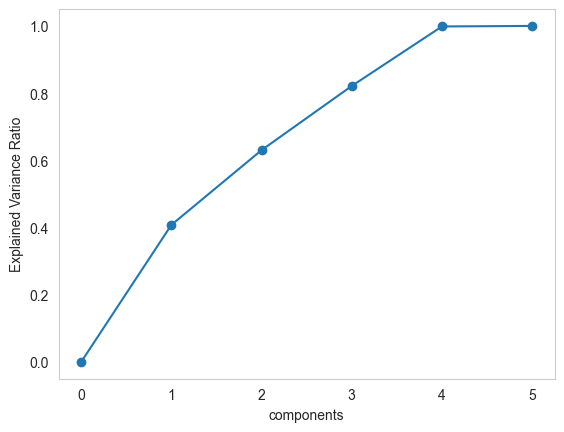

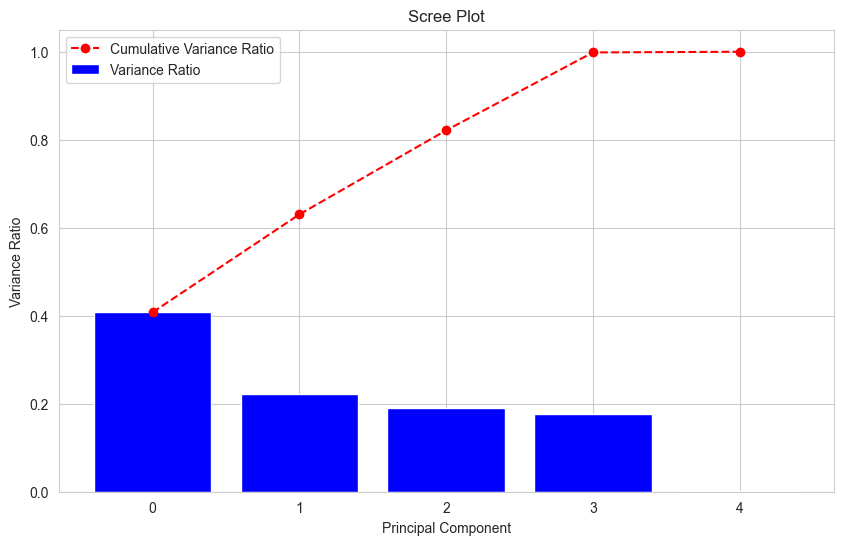

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load datasets
df2 = pd.read_csv('surveydata.csv')
ecom = pd.read_csv("ecommercedata.csv")
fash = pd.read_csv("picdata.csv")

# Preview
print(df2.head())
print(ecom.head())
print(fash.head())

# Descriptive statistics for ecommerce
print(ecom.describe())

# Standardize ecommerce dataset (after removing non-numeric columns if any)
ecom_data = ecom[ecom.columns[3:]]
scaler = StandardScaler()
scale_data = scaler.fit_transform(ecom_data)

# PCA with 4 components
pca = PCA(n_components=4)
pca.fit_transform(scale_data)
vr = sum(pca.explained_variance_ratio_)
print("Explained Variance Ratio (sum of 4 components):", vr)

# Determine sufficient number of components
nums = range(0, 6)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Scree plot function
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--', label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()

# Run scree plot
scree_plot(pca)


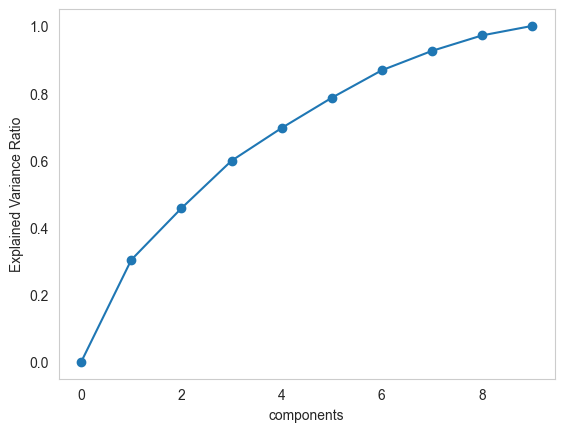

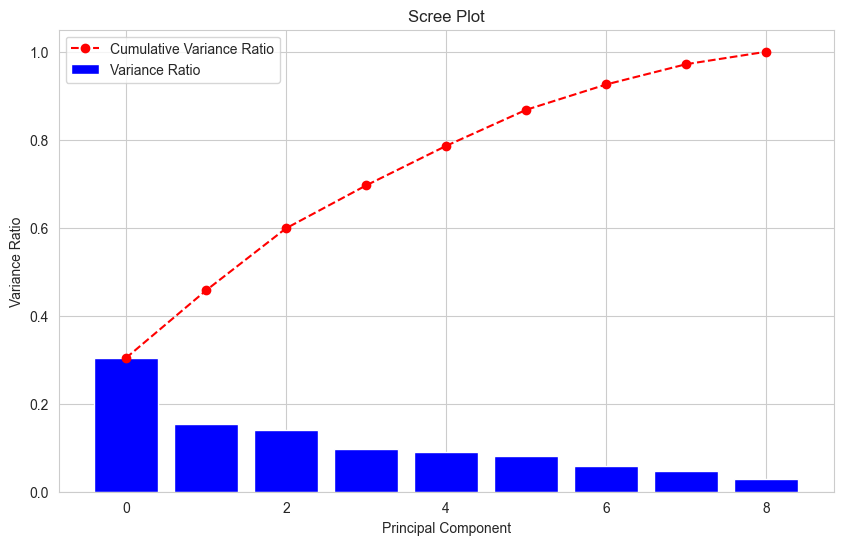

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Choose Likert-scale columns and clean
df_likert = df2[["Q6", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q18", "Q20"]].copy()
df_likert = df_likert.dropna()

# Standardize
scaler = StandardScaler()
scale_data = scaler.fit_transform(df_likert)

# PCA variance ratio analysis
nums = range(0, 10)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)A
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Scree plot function
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--', label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()

# Final PCA and plot
pca = PCA(n_components=9)
pca.fit(scale_data)
scree_plot(pca)


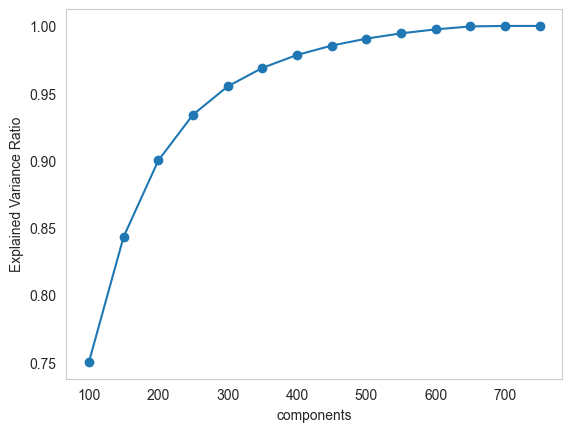

Transformed data shape (200 components): (10000, 200)


In [4]:
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Subset for image data (first 10000 samples)
x = fash.iloc[:10000, :784]
y = fash.iloc[:10000, -1]

# Standardize
scaler = StandardScaler()
scale_data = scaler.fit_transform(x)

# Range for Incremental PCA components
nums = range(100, 785, 50)
var_ratio = []
batch_size = None

for num in nums:
    ipca = IncrementalPCA(n_components=num, batch_size=batch_size)
    ipca.fit(scale_data)
    var_ratio.append(np.sum(ipca.explained_variance_ratio_))

plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Final transformation using 200 components
ipca = IncrementalPCA(n_components=200)
x_new = ipca.fit_transform(scale_data)
print("Transformed data shape (200 components):", x_new.shape)


Classification Model Development